In [2]:
import tensorflow as tf#TensorFlow is a free and open-source software library for dataflow and 
#differentiable programming across a range of tasks. It is a symbolic math library
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
'''Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.
It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train
neural network models in just a few lines of code'''

'Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.\nIt wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train\nneural network models in just a few lines of code'

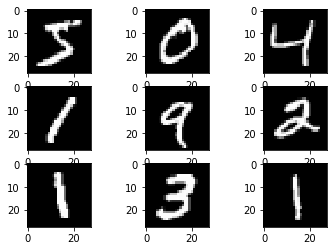

In [4]:
# plot first few images
from matplotlib import pyplot 
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)#rows,column,index
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
'''subplots method provides a way to plot multiple plots on a single figure. Given the number of rows and columns ,
it returns a tuple ( fig , ax ), giving a single figure fig with an array of axes ax .'''
pyplot.show()

3


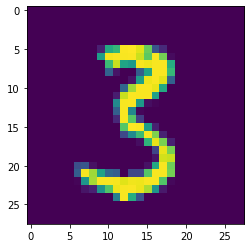

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
'''%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting
   commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
   The resulting plots will then also be stored in the notebook document.'''
image_index = 6754
print(y_train[image_index])
plt.imshow(x_train[image_index])#RGB, shows output with gray cmap.

In [6]:
x_train.shape #gives u rows , column coordinates(width and height of image)

(60000, 28, 28)

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #array(28,28,1),first two values are the pixels and 3rd is the colour RGB
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
'''We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, 
or 0 and 255.
We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.
A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1].
This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the 
maximum value.'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255 
'''At times, you want to get rid of distortions caused by lights and shadows in an image. 
Normalizing the RGB values of an image can at times be a simple and effective way of achieving this.'''
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))#28 is the number of filters
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))#128 is the number of neurons per unit
model.add(Dropout(0.2))
'''Dropout is a technique used to prevent a model from overfitting. ... Dropout works by randomly setting the outgoing
edges of hidden units(neurons that make up hidden layers) to 0 at each update of the training phase.'''
model.add(Dense(10,activation=tf.nn.softmax))


Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])#Metrics are measures of quantitative assessment commonly used for comparing,
#and tracking performance or production. 
'''Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure 
to update network weights iterative based in training data. ... The algorithm is called Adam. It is not an acronym and is
not written as “ADAM”.… the name Adam is derived from adaptive moment estimation.'''
history = model.fit(x=x_train,y=y_train, epochs=10)
'''epochs are passing the dataset multiple number of times through the neural network.As the number of epochs increases,
more number of times the weight are changed in the neural network and the curve goes from underfitting to optimal
to overfitting curve.'''



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2128 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0869 - acc: 0.9732
Epoch 3/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0603 - acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0443 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0359 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0310 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0249 - acc: 0.9915 0s - loss: 0.0247 - acc:
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0240 - acc: 0.9917
Epoch 9/10
60000/60000 [==============================] - 106s 2ms/step 

'epochs are passing the dataset multiple number of times through the neural network.As the number of epochs increases,\nmore number of times the weight are changed in the neural network and the curve goes from underfitting to optimal\nto overfitting curve.'

In [10]:
model.evaluate(x_test, y_test)
model.save('mnist.h5')
print("Saving the model as mnist.h5")

10000/10000 [==============================] - 8s 775us/step
Saving the model as mnist.h5


4443
2


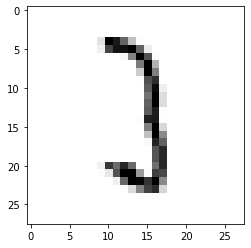

In [21]:
#wrong prediction
image_index = int(input())
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

2


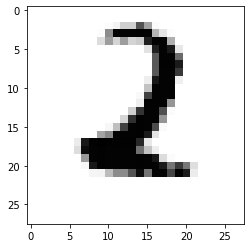

In [16]:
image_index = 4442
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [22]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
model = load_model('mnist.h5')
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()

67541224
2


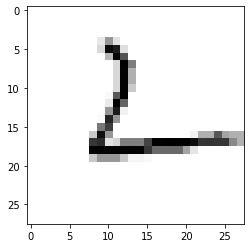

In [13]:
index = int(input(image_index)) 
plt.imshow(x_test[index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
print(pred.argmax())